In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
import seaborn as sn


**Extracting the first 120000 readings(takes some time):-**

In [ ]:
full=pd.read_csv('/content/PVGen.csv')
full=full.iloc[0:120000,:]


**Creating a seperate column to store only the dates:-**

In [ ]:
import datetime
dates=np.array([])
for date in full['Time']:
  date_object = datetime.datetime.strptime(date, '%d-%m-%Y %H:%M')
  a=datetime.datetime.strftime(date_object,'%m-%d-%y')
  dates=np.append(dates,a)

In [ ]:
full['Date']=dates

In [ ]:
full

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,Date
0,01-01-2017 00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,01-01-17
1,01-01-2017 00:15,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,01-01-17
2,01-01-2017 00:30,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,01-01-17
3,01-01-2017 00:45,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,01-01-17
4,01-01-2017 01:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,01-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,09-06-2020 22:45,0,0.0,10.6,1017,79,3.2,0.0,0.0,87,0,0,1020,0.0,4,22,6,06-09-20
119996,09-06-2020 23:00,0,0.0,10.1,1017,81,2.8,0.0,0.0,91,0,0,1020,0.0,4,23,6,06-09-20
119997,09-06-2020 23:15,0,0.0,10.1,1017,81,2.8,0.0,0.0,91,0,0,1020,0.0,4,23,6,06-09-20
119998,09-06-2020 23:30,0,0.0,10.1,1017,81,2.8,0.0,0.0,91,0,0,1020,0.0,4,23,6,06-09-20


In [ ]:
dates

array(['01-01-17', '01-01-17', '01-01-17', ..., '06-09-20', '06-09-20',
       '06-09-20'], dtype='<U32')

In [ ]:
buffer=np.array([])
start=0
while(start<120000):  #0-95 same date
  date=dates[start]
  mask_dataframe=full['Date']==date
  filtered_dataframe=full[mask_dataframe]
  mean=np.mean(filtered_dataframe['Energy delta[Wh]'])
  buffer=np.append(buffer,mean)
  start=start+96

In [ ]:
week_data=np.array([])
start=0
while(start<len(buffer)):
  date=dates[start]
  mean=np.mean(buffer[start:start+7])
  week_data=np.append(week_data,mean)
  start=start+7


In [ ]:
index=np.array(range(0,len(week_data)))
dict_data={'index':index,'week_data':week_data}
df=pd.DataFrame(dict_data)

**<h1><u>ARIMA MODEL</u></h1>**


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
X_train,X_test,y_train,y_test=train_test_split(df['index'],df['week_data'],test_size=0.3,shuffle=False)


**Using PMDARIMA to give the optimal value of differencing order(d) using ndiffs() function:-**

In [ ]:
!pip install pmdarima

In [ ]:

from pmdarima.arima.utils import ndiffs
ndif=ndiffs(y_train,alpha=0.05,test='adf')
print(ndif)
#differencing term is 1

1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

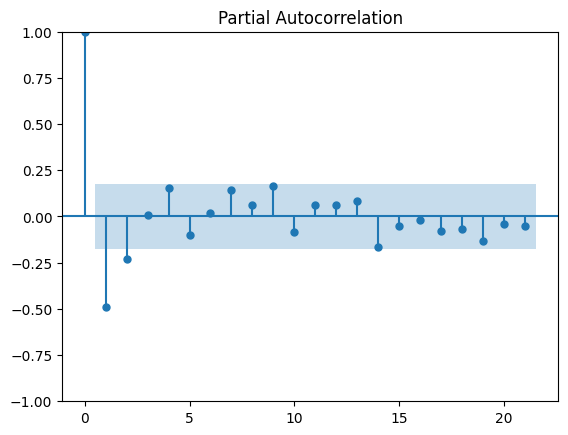

In [ ]:
plot_pacf(pd.Series(y_train).diff().dropna())
mp.show()
#AR terms can be 1

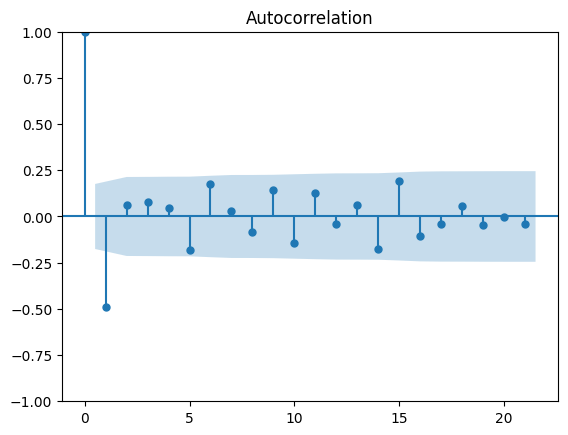

In [ ]:
plot_acf(pd.Series(y_train).diff().dropna());
#MA term can be 1

<Axes: ylabel='week_data'>

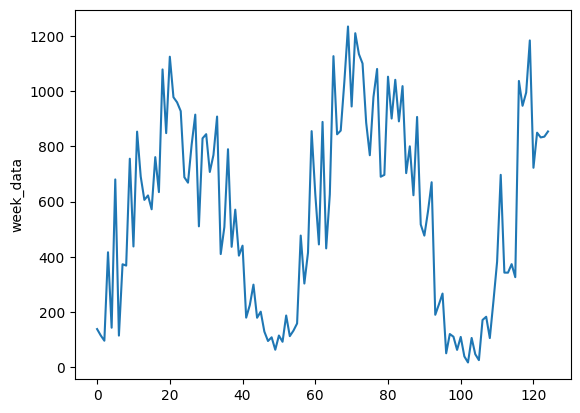

In [ ]:
sn.lineplot(y_train)

**As this is seasonal data we use Seasonal ARIMA with a seasonal differencing term of 52 as the data is weekly:**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y_train,order=(1,1,1),seasonal_order=(1,1,1,52))
result=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          week_data   No. Observations:                  125
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -496.178
Date:                            Sat, 15 Feb 2025   AIC                           1002.357
Time:                                    15:08:25   BIC                           1013.740
Sample:                                         0   HQIC                          1006.888
                                            - 125                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0935      0.133     -0.703      0.482      -0.354       0.167
ma.L1         -0.8863      0.079   

In [ ]:
X_test

,index
125,125
126,126
127,127
128,128
129,129
130,130
131,131
132,132
133,133
134,134


In [ ]:
final_result_arima=result.predict(start=X_test.values[0],end=X_test.values[len(X_test)-1],typ='levels')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
len(X_test)

54

# **The ARIMA model's inference on the test data:**#

<Axes: ylabel='predicted_mean'>

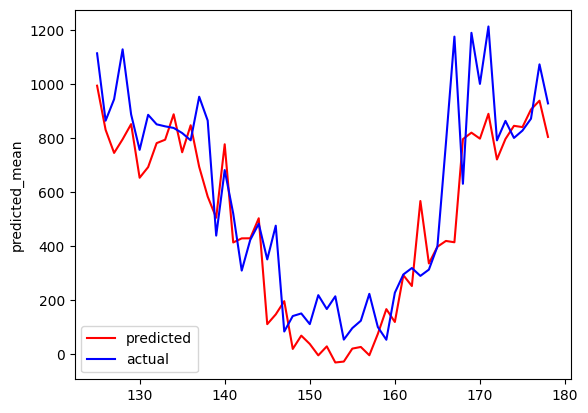

In [ ]:
sn.lineplot(final_result,color='red',label='predicted')
sn.lineplot(y_test,color='blue',label='actual')

**<h1><u>LSTM Model</u></h1>**

**Importing libraries for creation of network:-**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

**Creating the network:-**

In [ ]:
model=Sequential()
model.add(LSTM(700,activation='tanh',input_shape=(52,1),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(500,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(12))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')

## **Creating Training Data:-**

**Each output corresponds to the 52 values recorded before it taken as input:-**

In [ ]:
inputs=[]
outputs=[]
for i in range(0, len(df) - 52):
    inputs.append(df['week_data'][i:i+52])
    outputs.append(df['week_data'][i+52])
inputs=np.array(inputs)
outputs=np.array(outputs)


In [ ]:
inputs.shape

(127, 52)

In [ ]:
outputs.shape

(127,)

In [ ]:
params=EarlyStopping(monitor='val_loss',patience=30)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(inputs,outputs,test_size=54,shuffle=False)


In [ ]:
len(X_test)

54

In [ ]:
model.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test),callbacks=[params])


Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 220ms/step - loss: 487537.0000 - val_loss: 437789.7188
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 448862.6875 - val_loss: 389402.9688
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 389112.0000 - val_loss: 327693.8438
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 329882.1562 - val_loss: 257875.7031
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 252045.5938 - val_loss: 187198.1875
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 199097.6562 - val_loss: 136622.4219
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 145032.9531 - val_loss: 130143.1328
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 147358.8125 - val_loss: 151559.5938
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 171342.1719 - val_loss: 149469.0781
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 151380.2969 - val_loss: 133960.7031
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss

In [ ]:
prediction_lstm=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [ ]:
prediction_lstm.shape

(54, 1)

In [ ]:
preds=prediction_lstm.flatten()

In [ ]:
preds

array([798.5779 , 931.14355, 927.0171 , 936.5591 , 946.20715, 935.54126,
       867.87823, 874.84125, 868.0908 , 855.02423, 837.65344, 805.60443,
       740.8098 , 812.30725, 841.53076, 615.4908 , 579.91315, 574.4525 ,
       500.84186, 560.9199 , 572.1962 , 538.1675 , 570.4789 , 228.99632,
       150.68758, 125.95464, 111.3263 , 260.12186, 350.24274, 453.1432 ,
       198.88045, 117.47246, 109.00925, 265.76553, 216.68127, 143.19374,
       336.75208, 496.0595 , 514.9048 , 503.05096, 523.6835 , 562.00916,
       581.7224 , 879.67267, 776.85   , 931.0284 , 943.8273 , 946.8375 ,
       907.85443, 901.12573, 859.7788 , 833.58014, 840.59705, 934.97754],
      dtype=float32)

In [ ]:
y_test=y_test.flatten()

#**The LSTM model's inference on the test data:-**

<Axes: >

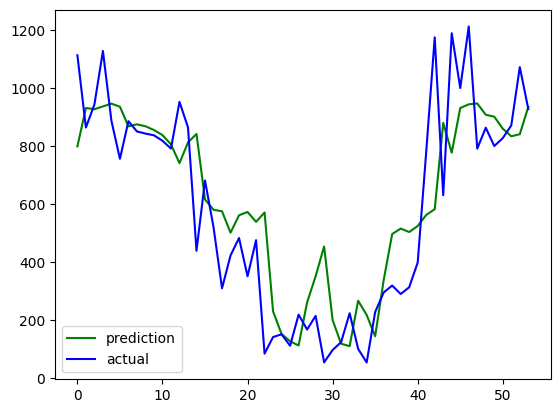

In [ ]:
index=np.array(range(0,len(preds)))
sn.lineplot(x=index,y=preds,label='prediction',color='green')
sn.lineplot(x=index,y=y_test,label='actual',color='blue')

In [ ]:
len(y_test)

54

**<h1><u>VAR Model</u></h1>**

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

**<h3>As the VAR Model uses at least two features to make predictions we will use the dayLength as second feature:- </h3>**

In [ ]:
buffer_e=np.array([])
buffer_r=np.array([])
start=0
while(start<len(dates)):  #0-95 same date
  date=dates[start]
  mask_dataframe=full['Date']==date
  filtered_dataframe=full[mask_dataframe]
  mean_e=np.mean(filtered_dataframe['Energy delta[Wh]'])
  mean_r=np.mean(filtered_dataframe['dayLength'])
  buffer_e=np.append(buffer_e,mean_e)
  buffer_r=np.append(buffer_r,mean_r)
  start=start+96

In [ ]:
week_data_e=np.array([])
week_data_r=np.array([])
start=0
while(start<len(buffer_e)):
  date=dates[start]
  mean_e=np.mean(buffer_e[start:start+7])
  mean_r=np.mean(buffer_r[start:start+7])
  week_data_e=np.append(week_data_e,mean_e)
  week_data_r=np.append(week_data_r,mean_r)
  start=start+7


In [ ]:
index=np.array(range(0,len(week_data_e)))
dict_data={'week_data':week_data_e,'day_data':week_data_r}
df=pd.DataFrame(dict_data)

**Creating the model:-**

In [ ]:
diff_e=df['week_data'].dropna()
diff_r=df['day_data']

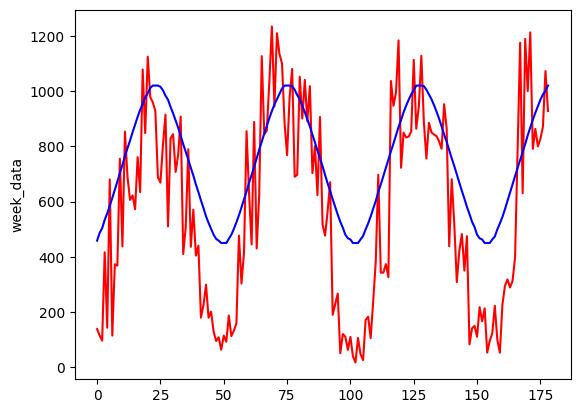

In [ ]:
sn.lineplot(diff_e,color='red')
sn.lineplot(diff_r,color='blue')
df['week_data']=diff_e
df['day_data']=diff_r

In [ ]:
from sklearn.model_selection import train_test_split
X_train,x_test=train_test_split(df,test_size=54,shuffle=False)

In [ ]:
X_train

,week_data,day_data
0,138.449405,458.571429
1,115.447917,486.428571
2,96.269345,503.571429
3,416.474702,533.571429
4,143.315476,557.142857
...,...,...
120,722.394345,895.714286
121,849.401786,923.571429
122,832.227679,947.142857
123,835.078869,968.571429


In [ ]:
model=VAR(X_train)

**<h3>Past 25 values will be used to make predictions</h3>**

In [ ]:
results=model.fit(maxlags=25)

In [ ]:
forecast = results.forecast(x_test.values, steps=len(x_test))
forecast = np.array(forecast)


In [ ]:
prediction_var=np.array([])
for a in forecast:
  prediction_var=np.append(prediction_var,a[0])


In [ ]:
x_test['indices']=range(0,len(x_test))

In [ ]:
prediction_var=pd.DataFrame(prediction_var)
prediction_var['indices']=range(0,len(x_test))

# **The VAR Model's inference on test data:-**

<Axes: xlabel='indices', ylabel='week_data'>

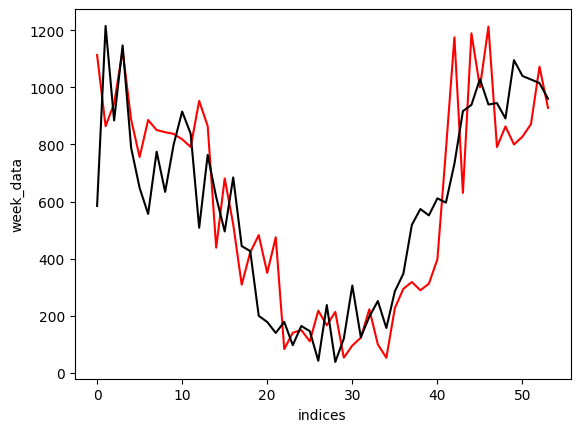

In [ ]:
sn.lineplot(data=x_test,y='week_data',x='indices',color='red',legend=True)
sn.lineplot(data=prediction_var,y=0,x='indices',color='black',legend=True)

In [ ]:
len(y_test)

54

**<h1><u>Accessing the predictions of the three models</h1></u>**

In [ ]:
final_result_arima

,predicted_mean
125,993.270066
126,830.118749
127,744.362356
128,794.889544
129,851.053000
130,652.488041
131,691.869213
132,780.650577
133,793.326815
134,887.478618


In [ ]:
len(final_result_arima)

54

In [ ]:
prediction_arima=final_result_arima.to_numpy()

<Axes: >

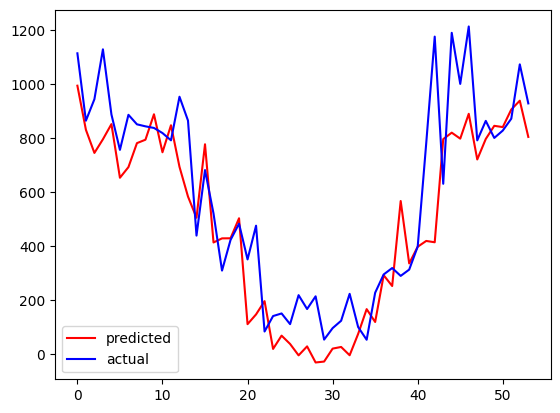

In [ ]:
sn.lineplot(prediction_arima,color='red',label='predicted')
sn.lineplot(y_test,color='blue',label='actual')

In [ ]:
prediction_arima

array([993.27006618, 830.11874871, 744.36235574, 794.88954383,
       851.05299962, 652.48804106, 691.86921315, 780.65057722,
       793.32681515, 887.47861815, 746.82544677, 846.88188337,
       692.90223146, 582.82959816, 504.46422014, 776.43849625,
       412.88617772, 428.02976811, 428.3555228 , 502.4962054 ,
       110.39135642, 146.50804573, 195.61072769,  18.72935277,
        67.93521406,  37.10723718,  -5.08395009,  28.12513723,
       -31.45865209, -28.08925298,  19.87277034,  25.99482147,
        -4.72145316,  74.38415305, 166.0425806 , 118.4939953 ,
       291.62066183, 251.64006798, 566.30843773, 335.19164497,
       397.04888647, 418.50710362, 413.58689266, 795.49860284,
       819.40690632, 797.2284159 , 889.20776907, 720.20739826,
       795.97237995, 844.71951634, 840.06674293, 905.23419249,
       937.81280089, 803.62009947])

In [ ]:
len(prediction_arima)

54

In [ ]:
prediction_lstm=prediction_lstm.flatten()

In [ ]:
prediction_lstm

array([798.5779 , 931.14355, 927.0171 , 936.5591 , 946.20715, 935.54126,
       867.87823, 874.84125, 868.0908 , 855.02423, 837.65344, 805.60443,
       740.8098 , 812.30725, 841.53076, 615.4908 , 579.91315, 574.4525 ,
       500.84186, 560.9199 , 572.1962 , 538.1675 , 570.4789 , 228.99632,
       150.68758, 125.95464, 111.3263 , 260.12186, 350.24274, 453.1432 ,
       198.88045, 117.47246, 109.00925, 265.76553, 216.68127, 143.19374,
       336.75208, 496.0595 , 514.9048 , 503.05096, 523.6835 , 562.00916,
       581.7224 , 879.67267, 776.85   , 931.0284 , 943.8273 , 946.8375 ,
       907.85443, 901.12573, 859.7788 , 833.58014, 840.59705, 934.97754],
      dtype=float32)

<Axes: >

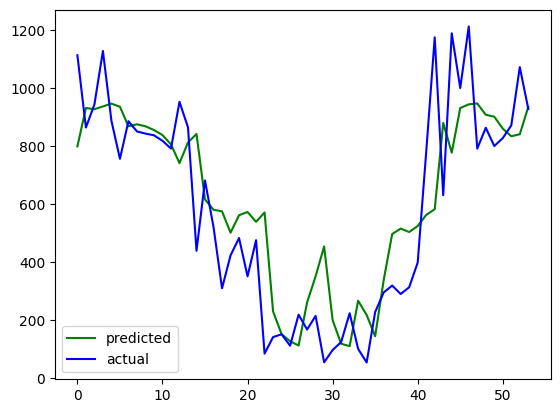

In [ ]:
sn.lineplot(prediction_lstm,color='green',label='predicted')
sn.lineplot(y_test,color='blue',label='actual')

In [ ]:
len(prediction_lstm)

54

In [ ]:
prediction_var=prediction_var[0].to_numpy()

In [ ]:
prediction_var

array([ 584.61445066, 1214.95016173,  883.98786009, 1146.59370515,
        788.51548963,  647.39311343,  556.52826727,  774.64274902,
        633.83268324,  799.8131803 ,  915.07277661,  837.40962707,
        508.25663564,  763.38545368,  615.31535166,  495.26728261,
        684.48647583,  443.96042959,  426.31768   ,  199.7208348 ,
        178.02842225,  139.83753241,  178.50757242,   96.76620624,
        164.11186423,  146.13818847,   42.20484322,  237.43759724,
         38.31000205,  119.91595583,  305.72433462,  124.86962599,
        196.98849835,  251.52452456,  157.21976841,  285.66420475,
        347.37494547,  518.55709422,  573.69743032,  551.46228276,
        611.21880098,  596.09668619,  732.00198903,  916.68343394,
        938.36434721, 1028.7397978 ,  939.79847068,  944.63946652,
        890.84994326, 1095.16688412, 1039.72439912, 1027.38142173,
       1014.73612266,  959.93714629])

<Axes: >

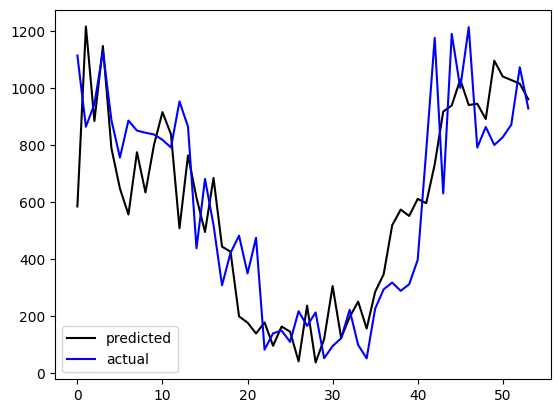

In [ ]:
sn.lineplot(prediction_var,color='black',label='predicted')
sn.lineplot(y_test,color='blue',label='actual')

In [ ]:
len(prediction_var)

54

In [ ]:
prediction_combined=np.array([])
for i in range(0,54):
  comb=[prediction_arima[i],prediction_lstm[i],prediction_var[i]]
  prediction_combined=np.append(prediction_combined,[comb])
prediction_combined=prediction_combined.reshape(54,3)
prediction_combined.shape

(54, 3)

**<h2>Combining results using Simple Average:-</h2>**

In [ ]:
predictions_meaned=np.array([])
for i in range(0,54):
  predictions_meaned=np.append(predictions_meaned,np.mean([prediction_combined[i][0],prediction_combined[i][1],prediction_combined[i][2]]))
print(predictions_meaned)
len(predictions_meaned)

[792.15413257 992.07082171 851.78910189 959.34744367 861.92521419
 745.14080475 705.42523843 810.04485793 765.08343957 847.43867647
 833.18388859 829.96531386 647.32289385 719.50743427 653.77011117
 629.06552085 559.09526684 482.14757078 451.83835357 421.04565402
 286.87200223 274.8376862  314.86572731 114.83062722 127.5782182
 103.06668963  49.48239824 175.22819705 119.03136226 181.65663044
 174.82585078  89.44563512 100.42543067 197.22473702 179.98120781
 182.45064697 325.2492275  422.08555716 551.6368844  463.23496403
 510.65038638 525.53764836 575.77043127 863.95156841 844.87374304
 918.99886502 924.27783675 870.56146307 864.89225145 947.00404429
 913.18998355 922.06525113 931.04865648 899.51159494]


54

In [ ]:
y_test_df=pd.DataFrame(y_test)
y_test_df['index']=range(0,len(y_test))
y_test_df

,0,index
0,1113.175595,0
1,863.651786,1
2,943.281250,2
3,1127.880952,3
4,886.895833,4
5,755.735119,5
6,885.492560,6
7,850.273810,7
8,842.813988,8
9,836.879464,9


# **The inference of Simple Mean Ensemble model on dataset:**

<Axes: >

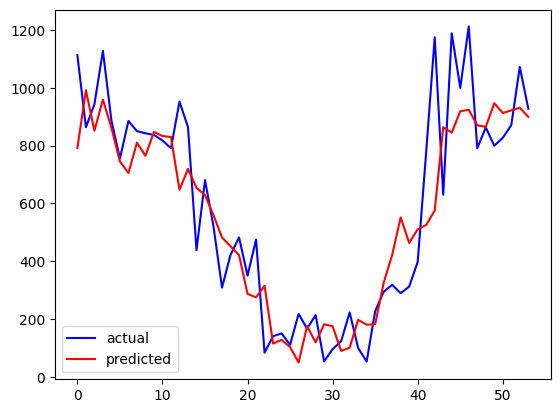

In [ ]:

sn.lineplot(y_test,color='blue',label='actual')
sn.lineplot(predictions_meaned,color='red',label='predicted')

In [ ]:
loss_mse=mean_squared_error(y_test,predictions_meaned)
difference=np.absolute(y_test-predictions_meaned)
loss_mae=np.mean(difference)
print(loss_mse)
print(loss_mae)

27082.229837174717
121.84162318140152


**<h2>Combining results using CNN model:-</h2>**

In [ ]:

from tensorflow.keras.layers import Conv1D, MaxPooling1D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.layers import Input



In [ ]:
prediction_combined.shape

(54, 3)

In [ ]:
X_train_ens,X_test_ens,y_train_ens,y_test_ens=train_test_split(prediction_combined,y_test,test_size=0.2,shuffle=False)

In [ ]:
from tensorflow.keras.regularizers import l2

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001), input_shape=(3, 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])
cnn_model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.fit(X_train_ens,y_train_ens,epochs=100,validation_data=(X_test_ens, y_test_ens))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 370283.6875 - val_loss: 839368.9375
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 324527.9375 - val_loss: 810104.8125
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 369293.2188 - val_loss: 779764.0625
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 334601.1875 - val_loss: 749103.6250
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 341392.5625 - val_loss: 716362.5625
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 319413.4062 - val_loss: 679824.9375
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 289017.4688 - val_loss: 641584.8125
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 287017.2812 - val_loss: 599162.6875
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 261577.8281 - val_loss: 550484.7500
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 229596.5312 - val_loss: 494852.8125
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 21

In [ ]:
prediction_cnn=cnn_model.predict(prediction_combined)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [ ]:
prediction_cnn=prediction_cnn.flatten()

In [ ]:
prediction_cnn.shape

(54,)

In [ ]:
y_test.shape

(54,)

# **The inference of CNN Ensemble model on dataset:**

<Axes: >

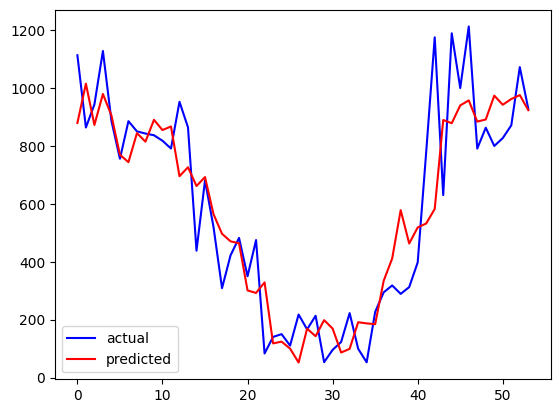

In [ ]:
sn.lineplot(y_test,color='blue',label='actual')
sn.lineplot(prediction_cnn,color='red',label='predicted')

In [ ]:
loss_mse=mean_squared_error(y_test,prediction_cnn)
difference=np.absolute(y_test-prediction_cnn)
loss_mae=np.mean(difference)
print(loss_mse)
print(loss_mae)

25160.806802951156
117.59195431367851


**<h2>Combining results using MLP model:-</h2>**

In [ ]:
mlp_model = Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model (Adam optimizer with MSE loss)
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model Summary
mlp_model.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_204 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
prediction_combined.shape

(54, 3)

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
# Fit the MLP model with the reshaped data
mlp_model.fit(
    prediction_combined,
    y_test,
    epochs=100,
    validation_data=(X_test_ens, y_test_ens),
    callbacks=[early_stopping]
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 403713.7188 - mae: 539.2993 - val_loss: 608929.8125 - val_mae: 761.7826
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 315037.0000 - mae: 472.9868 - val_loss: 481153.0938 - val_mae: 672.7925
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 250653.8750 - mae: 416.0879 - val_loss: 365462.5000 - val_mae: 580.4200
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 209399.9062 - mae: 365.8402 - val_loss: 268499.5312 - val_mae: 489.4388
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 165134.6406 - mae: 320.5902 - val_loss: 179748.3125 - val_mae: 388.1711
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 135445.8594 - mae: 279.0454 - val_loss: 107614.8438 - val_mae: 280.0032
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 86156.5391 - mae: 224.7115 - val_loss: 56360.1719 - val_mae: 183.0028
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - loss: 60425.2656 - mae: 185.6163 - val_l

In [ ]:

mlp_loss, mlp_mae = mlp_model.evaluate(X_test_ens, y_test_ens)
print(f"MLP Test Loss (MSE): {mlp_loss}")
print(f"MLP Test MAE: {mlp_mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 27916.2871 - mae: 134.7440
MLP Test Loss (MSE): 27916.287109375
MLP Test MAE: 134.74400329589844


In [ ]:
mlp_predictions = mlp_model.predict(prediction_combined)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [ ]:
mlp_predictions=mlp_predictions.flatten()

# **The inference of the MLP Ensemble Model on Dataset:**

<Axes: >

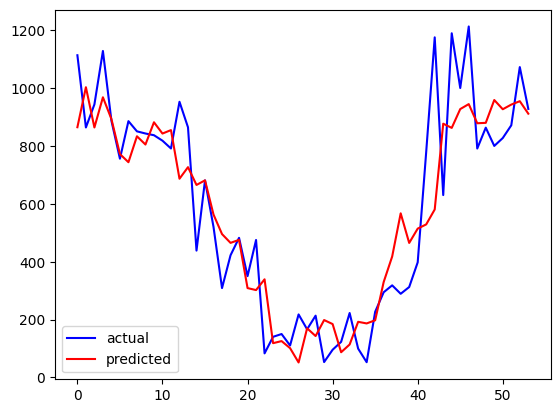

In [ ]:
sn.lineplot(y_test,color='blue',label='actual')
sn.lineplot(mlp_predictions,color='red',label='predicted')

In [ ]:
mlp_loss, mlp_mae = mlp_model.evaluate(X_test_ens, y_test_ens)
print(f"MLP Test Loss (MSE): {mlp_loss}")
print(f"MLP Test MAE: {mlp_mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 27916.2871 - mae: 134.7440
MLP Test Loss (MSE): 27916.287109375
MLP Test MAE: 134.74400329589844


**<h1>Comparing all the predictions:-</h1>**

<Axes: >

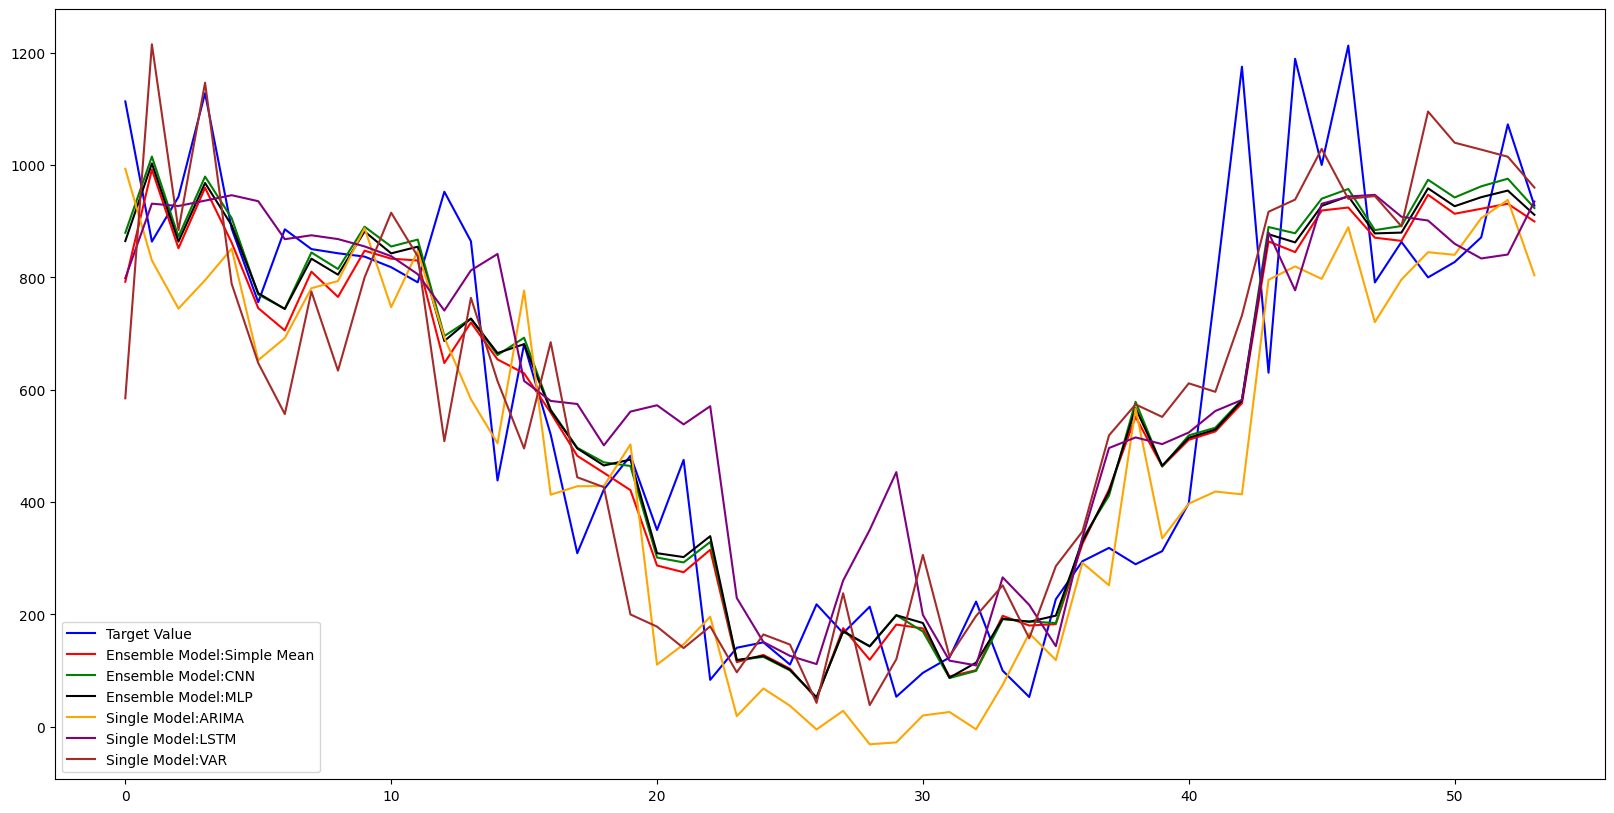

In [ ]:
import matplotlib.pyplot as mp
figure=mp.figure(figsize=(20,10))
sn.lineplot(y_test,color='blue',label='Target Value')
sn.lineplot(predictions_meaned,color='red',label='Ensemble Model:Simple Mean')
sn.lineplot(prediction_cnn,color='green',label='Ensemble Model:CNN')
sn.lineplot(mlp_predictions,color='black',label='Ensemble Model:MLP')
sn.lineplot(prediction_arima,color='orange',label='Single Model:ARIMA')
sn.lineplot(prediction_lstm,color='purple',label='Single Model:LSTM')
sn.lineplot(prediction_var,color='brown',label='Single Model:VAR')

In [ ]:

all_loss_mse=[mean_squared_error(y_test,predictions_meaned),mean_squared_error(y_test,prediction_cnn),mean_squared_error(y_test,mlp_predictions),mean_squared_error(y_test,prediction_arima),mean_squared_error(y_test,prediction_lstm),mean_squared_error(y_test,prediction_var)]


In [ ]:
all_loss_mse

[27082.229837174717,
 25160.806802951156,
 25379.81779318327,
 37036.14828307759,
 37039.791625370926,
 40128.87828531332]